In [5]:
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [6]:
# 1. Define File Paths 
# Paths are relative to the project root directory (daily-gridded-meteo/)
NETCDF_FILE = Path("../data/raw/PNWNAmet_pr.nc.nc")
SHAPEFILE = Path("../data/gis/Chittenden_catchment.shp") 

In [7]:
# 2. Load and Explore NetCDF Structure
try:
    ds = xr.open_dataset(NETCDF_FILE)
    print("--- NetCDF Dataset Structure ---")
    print(ds)
    print("\n--- Coordinates ---")
    print(list(ds.coords))
    print("\n--- Data Variables ---")
    print(list(ds.data_vars))

    precip_var = 'pr'
    
except FileNotFoundError as e:
    print(f"Error: A file was not found. Please check the path: {e}")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

--- NetCDF Dataset Structure ---
<xarray.Dataset> Size: 653MB
Dimensions:  (time: 293, lat: 512, lon: 1088)
Coordinates:
  * lat      (lat) float64 4kB 71.97 71.91 71.84 71.78 ... 40.16 40.09 40.03
  * lon      (lon) float64 9kB -169.0 -168.9 -168.8 ... -101.2 -101.1 -101.0
  * time     (time) datetime64[ns] 2kB 1953-12-12 1953-12-13 ... 1954-09-30
Data variables:
    pr       (time, lat, lon) float32 653MB ...
Attributes:
    history:      Wed Oct 04 11:56:15 2017: cdo -select,name=pr pr+tasmax+tas...
    _nc3_strict:  1
    date:         2015-04-05 16:57:30
    notes:        Tps interpolation to 0.0625-deg grid over western North Ame...
    CDO:          Climate Data Operators version 1.6.9 (http://mpimet.mpg.de/...
    CDI:          Climate Data Interface version 1.6.9 (http://mpimet.mpg.de/...
    Conventions:  CF-1.4

--- Coordinates ---
['lat', 'lon', 'time']

--- Data Variables ---
['pr']



Plotting a map for the first timestep using variable 'pr'...


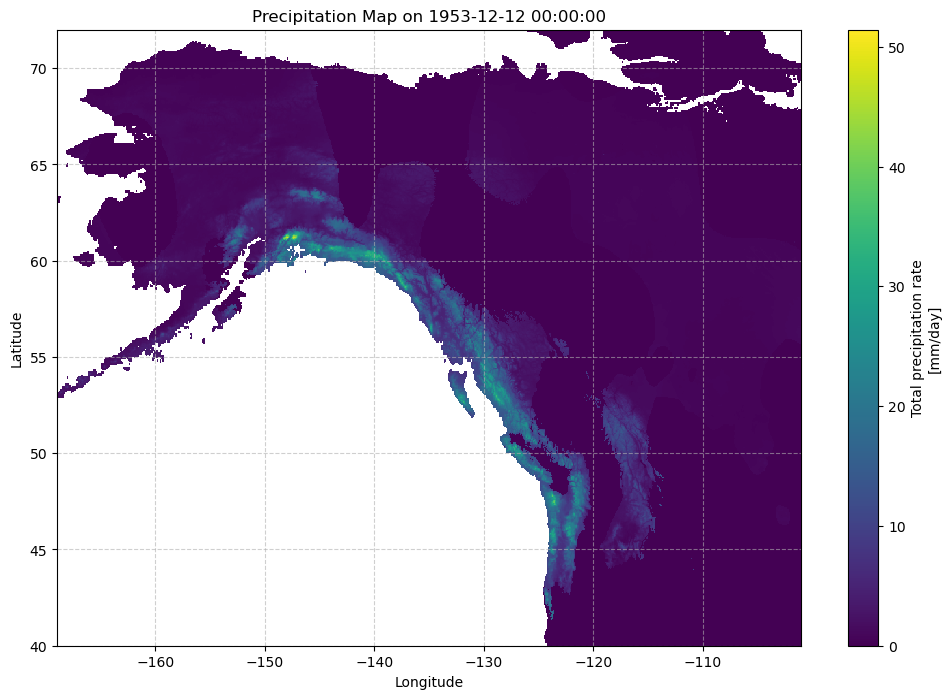

In [8]:
# 3. Initial Visualization: Map of Precipitation for a Single Timestep
print(f"\nPlotting a map for the first timestep using variable '{precip_var}'...")
# Select the first time step for plotting
precip_first_step = ds[precip_var].isel(time=0)

plt.figure(figsize=(12, 8))
precip_first_step.plot(cmap='viridis')
plt.title(f"Precipitation Map on {pd.to_datetime(precip_first_step.time.values)}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Plotting a time series for a single grid point...


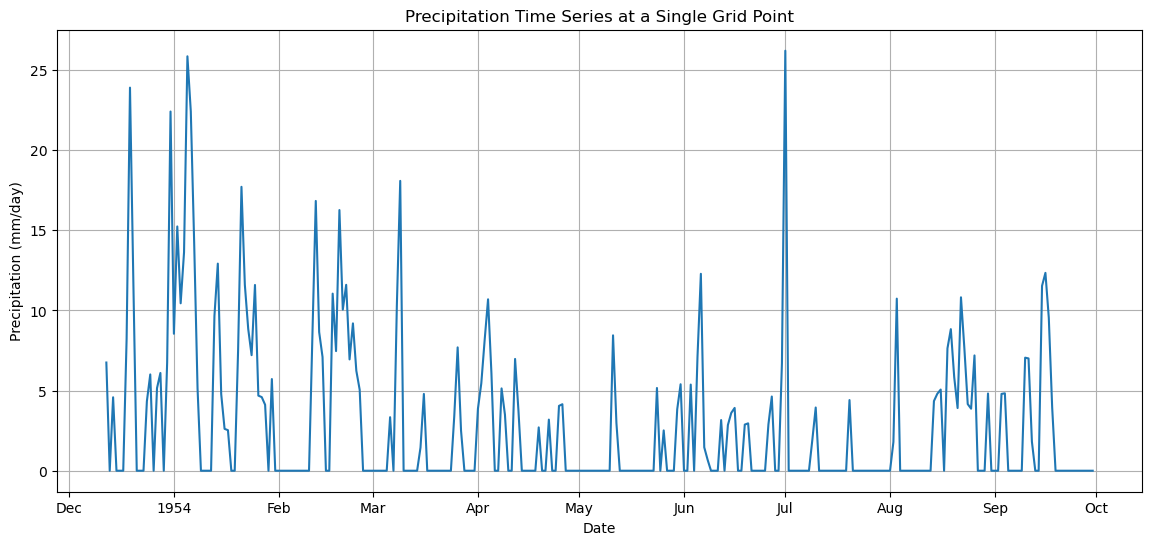

In [9]:
# 4. Initial Visualization: Time Series for a Single Point
print(f"Plotting a time series for a single grid point...")
# Select a single point using coordinates (adjust lat/lon values to be within your data)
sample_point = ds[precip_var].sel(lat=49.2, lon=-121.0, method='nearest')

plt.figure(figsize=(14, 6))
sample_point.plot()
plt.title("Precipitation Time Series at a Single Grid Point")
plt.ylabel(f"Precipitation ({ds[precip_var].attrs.get('units', 'unknown units')})")
plt.xlabel("Date")
plt.grid(True)
plt.show()